# Edge Detection
*Luis Eduardo Robles Jiménez || 0224969*

*Sara Carolina Gómez Delgado || 0226594*

In [61]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Part 1

### Read image

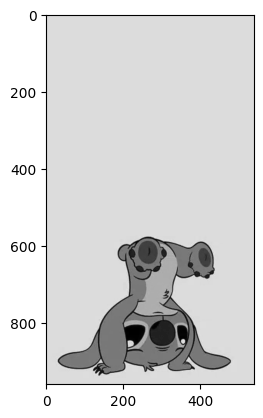

In [62]:
# img = cv2.cvtColor(cv2.imread("../../images/clifford.jpg"), cv2.COLOR_BGR2RGB)
img = cv2.imread("../../images/stitch.webp", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.show()

### Canny Edge Detection
##### *OpenCV*

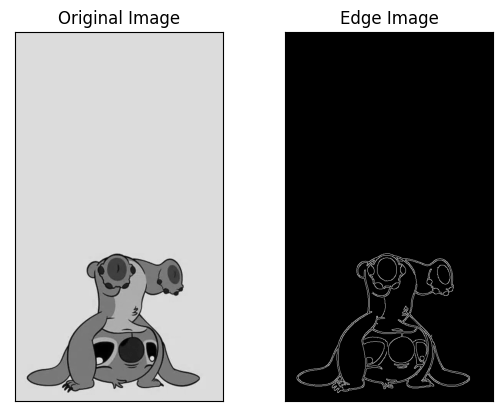

In [63]:
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Ours

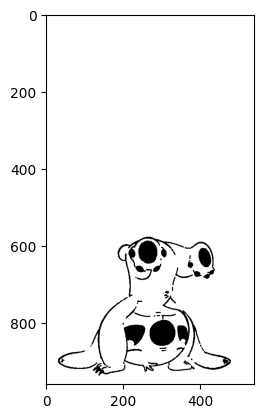

In [64]:
gray = img

# blur
blur = cv2.GaussianBlur(gray, (0,0), sigmaX=33, sigmaY=33)

# divide
divide = cv2.divide(gray, blur, scale=255)

# otsu threshold
thresh = cv2.threshold(divide, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)


#write result 
plt.imshow(morph, cmap = "gray")


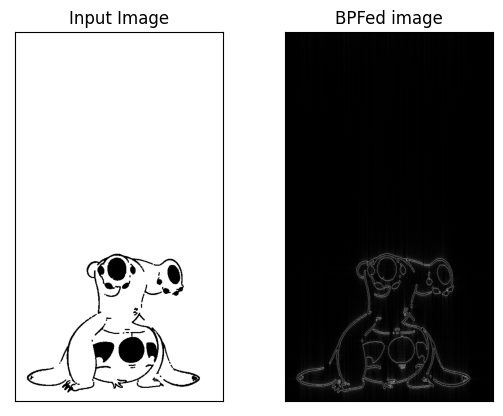

In [65]:
img = morph

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center



r = 130
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 0
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_One = cv2.idft(f_ishift)
img_One = cv2.magnitude(img_One[:,:,0],img_One[:,:,1])



plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_One, cmap = 'gray')
plt.title('BPFed image'), plt.xticks([]), plt.yticks([])
plt.show()

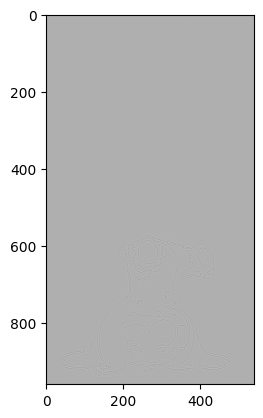

In [66]:
img_back = img_One


imgOne = cv2.filter2D(img_back, -1,(np.array(
   [  [1,4,1],
      [4,-20,4],
      [1,4,1]
   ]
   # [  [0,1,0],
   #    [1,-4,1],
   #    [0,1,0]
   # ]
)))
imgOne = np.add(imgOne, np.max(np.abs(imgOne)))
imgOne = imgOne/np.max(imgOne)*255
plt.imshow(imgOne, cmap = "gray")


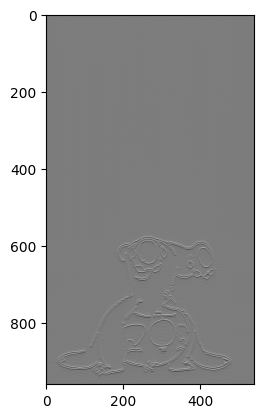

In [67]:
imgTwo = cv2.filter2D(img_back, -1,(np.array(
   [  [-1,-1,-1],
      [0,0,0],
      [1,1,1]
   ]
)))
imgTwo = np.add(imgTwo, np.max(np.abs(imgTwo)))
imgTwo = imgTwo/np.max(imgTwo)*255
plt.imshow(imgTwo, cmap = "gray")

(960, 540)


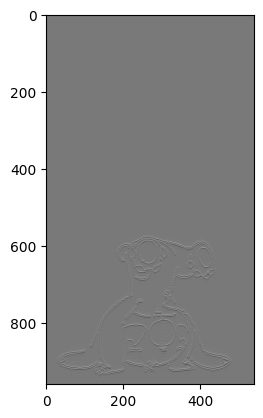

In [68]:
img = cv2.addWeighted(imgOne, 0.5, imgTwo, 0.5, 0)
print(img.shape)
plt.imshow(img, cmap = "gray")

[ 60.721397  60.895275  64.73457  ... 244.70996  247.49484  250.70123 ]


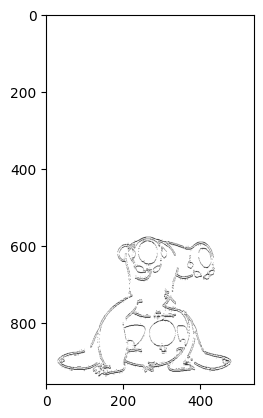

In [69]:
print(np.unique(img))
x = 138
_, img = cv2.threshold(img, x, x, cv2.THRESH_BINARY)
plt.imshow(img, cmap = 'gray')

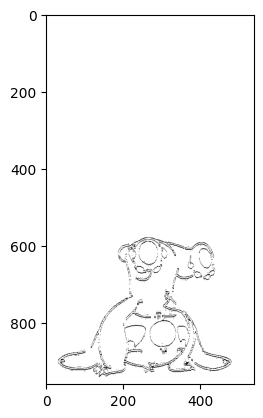

In [70]:
k = np.array([[1, 1], [1, 1]])
img = cv2.erode(img, k, iterations=1)
img = cv2.dilate(img, k, iterations=1)
plt.imshow(img, cmap= 'gray')

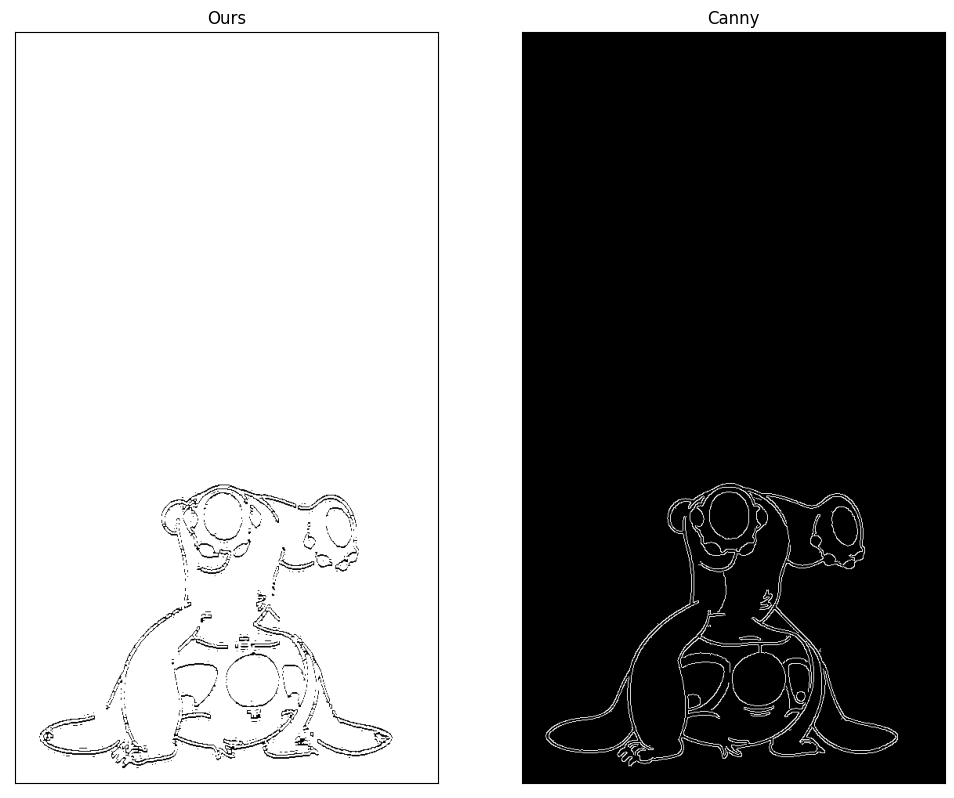

In [71]:
plt.figure(figsize=(12,12))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Ours'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.show()

### What do you observe? What modifications would you make to your algorithm? Describe your process in detail.
 Write some text here

## Part 2